# Decision Tree Classifier - Python Scikit-Learn<br>

### Scenario<br>

Universal bank gives loans to its customers as part of their services. They're interested in finding out what features best descibe someone who's most likley to <b>not</b> return their loan successfully. For this task, it would be great to utilize a decision tree.<br>

Our features from the data set is as follows:<br>
<img src="Decision_Tree_Features.png">

In [1]:
# As usual importing the modules we'll be working with.
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\net70\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
myData = pd.read_csv('loan.csv')
myData.head()

,age,ed_new,employ,address,income,debtinc,creddebt,othdebt,Rloan
0,41,2,17,12,176,9.3,11.359392,5.008608,0
1,27,1,10,6,31,17.3,1.362202,4.000798,1
2,40,1,15,14,55,5.5,0.856075,2.168925,1
3,41,1,15,14,120,2.9,2.658720,0.821280,1
4,24,1,2,0,28,17.3,1.787436,3.056564,0


It would be easier to look at Rloan as "no" and "yes" values rather than 0-1, so let's change that real quick.

In [3]:
myData['Rloan'] = np.where(myData['Rloan']==0, 'no', 'yes')
myData.head()

,age,ed_new,employ,address,income,debtinc,creddebt,othdebt,Rloan
0,41,2,17,12,176,9.3,11.359392,5.008608,no
1,27,1,10,6,31,17.3,1.362202,4.000798,yes
2,40,1,15,14,55,5.5,0.856075,2.168925,yes
3,41,1,15,14,120,2.9,2.658720,0.821280,yes
4,24,1,2,0,28,17.3,1.787436,3.056564,no


In [4]:
# Checking for missing data
np.unique(myData.isnull())

array([False], dtype=bool)

### Splitting the Data (train & test)<br>

Ok, so up until now we really just kind of did a quick review of at the data. It's time to dig a little deeper in order to get much more accurate and reliable conclusions. <br>

First off, we will split our data into a training & testing sets (70/30) in order to avoid over fitting.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(myData.drop(['Rloan'], 1), myData['Rloan'], test_size=0.3, random_state=1234)

### Decision Tree<br>
Ok, we're done fiddling around with the data, time to run the tree model on our training set!

In [6]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Ok so we fitted our tree and traind it, let's see what our tree looks like.

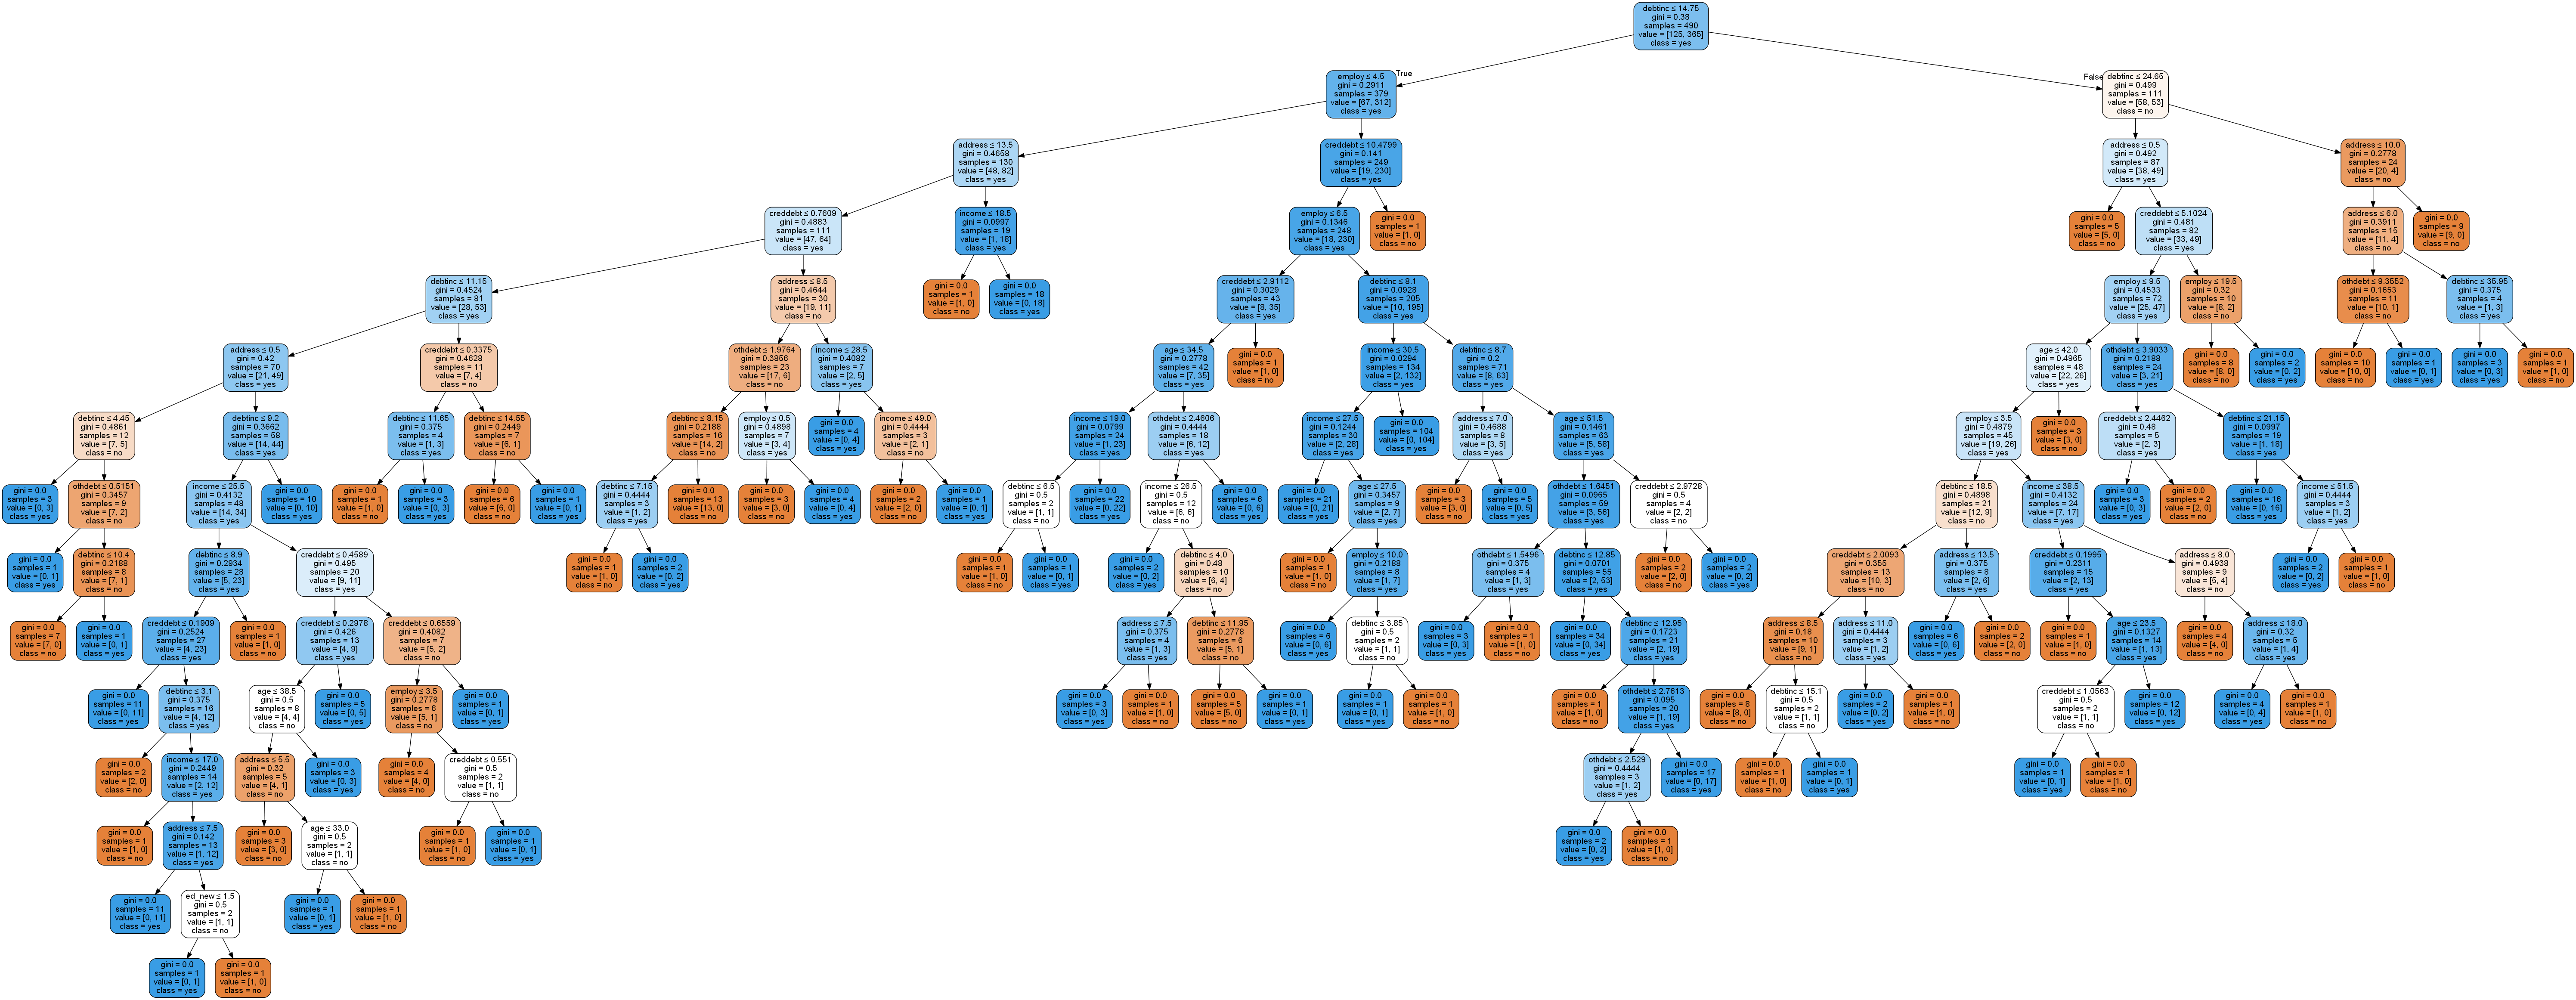

In [7]:
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=x_train.columns,  
                         class_names=tree.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

ok hold the phone for a minute! That's a huge tree!<br>
Why did this happen? well, unlike R language that gives you automatic tree truncnation, in Python we need to specify to our tree model how much depth and width we want it to have. Otherwise it will fit the model onto all data points, in this case yielding a tree that doesn't tell us much.<br>
In order to match the R tutorial I gave on Decision Trees, I'll truncnate the tree appropriately.

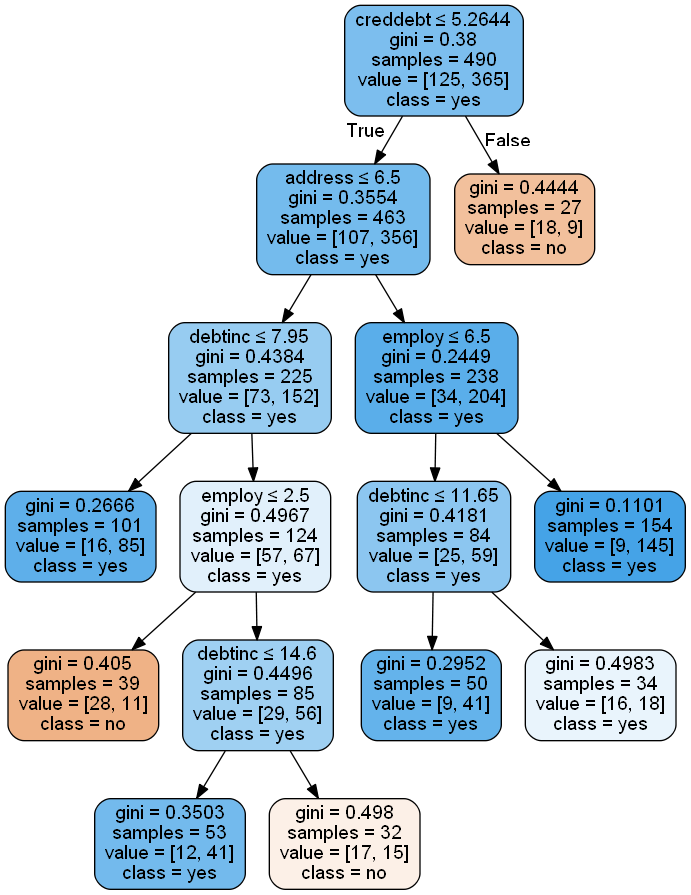

In [8]:
tree = DecisionTreeClassifier(max_depth=4, max_features=2, max_leaf_nodes=8, random_state=1234)
tree.fit(x_train, y_train)

# Reploting the tree
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=x_train.columns,  
                         class_names=tree.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Looking at the graph above, We can see how the tree model classifies the customers.<br>
1) Tree has 7 Treminal nodes with 5 layres<br>
2) The trees independent variables are: debtinc, employ, address & creddebt. It's best predictor is creddebt.<br>
Let's imagine someone named Yossi. Yossi is 30 years old, his debtinc=10, employed 4 years at the same place with 40k$     income, lives in his current address for 6 years with a creddebt of 0.3 . How would our Tree Classify him?
Yossi is classified as someone who would be able to return his loan.<br><br>

<b><i>Note:</i></b> This is another area where you can see diffrences between R models and Python models(see my R decision tree tutorial). Thus it's best to be acquainted with both languages.
### Cross Validation<br>

Ok, cross validation time. We need to see how reliant our model is on order to avoid potential overfitting or underfitting.<br>
To do this we'll build a <i>Confusion Matrix</i> for both our training and test sets. This will provide a way to examine where our model weak spots are and also how well it did in general by confronting the predictions of the model with reality.

In [9]:
predicted = tree.predict(x_train)
cmatTrain = pd.crosstab(index=y_train, columns=predicted, margins=True)
cmatTrain

col_0,no,yes,All
Rloan,,,
no,63,62,125
yes,35,330,365
All,98,392,490


This is our confusion matrix(cmat) for our training set. Let's explore the results.<br>

So as you can see, we have a few aspects to our cmat (from left to right).<br>
<b>TN</b> - True Negatives = 63<br>
<b>FP</b> - False Positives = 62<br>
<b>FN</b> - False Negatives = 35<br>
<b>TP</b> - True Positives = 330<br>

As we continue we want to figure out the following:<br>
<b>Sensitivity</b> = TP/(TP + FN)  -> Sensitivity is the ratio of all the correctly predicted positive examples (True Positive) to all the positive examples in the data.<br>
<b>Specificity</b> = TN/(TN + FP) -> Specificity measures the true negative rate: the proportion of negatives that are correctly identified.<br>
<b>Precision</b> = TP/(TP+FP) -> Precision (positive predictive value) measures the accuracy of the classifier, when it predicts an example to be positive (True Positive).<br>
<b>Accuracy</b> = (TN + TP)/(TN+TP+FN+FP) -> The ratio of correct predictions, (both positive and negative) to all predictions.<br>

This will detirmine how strong our model is.


In [10]:
TN = cmatTrain.iloc[0,0]
FP = cmatTrain.iloc[0,1]
FN = cmatTrain.iloc[1,0]
TP = cmatTrain.iloc[1,1]

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP+FP)
accuracy = (TN + TP)/(TN+TP+FN+FP)

print('Sensitivity = {se}, Specificity = {sp}, Precision = {p}, Accuracy = {a}'.format(se=sensitivity, sp=specificity, 
                                                                                       p=precision, a=accuracy))

Sensitivity = 0.9041095890410958, Specificity = 0.504, Precision = 0.8418367346938775, Accuracy = 0.8020408163265306


Based on the training set, we can see that we have 80%-90% reliance. Not bad, now let's see how well our model does when confronted with new data it has yet seen (the test set). In other words, let's see what it's really worth.

In [11]:
predicted = tree.predict(x_test)
cmatTest = pd.crosstab(index=y_test, columns=predicted, margins=True)
cmatTest

col_0,no,yes,All
Rloan,,,
no,22,36,58
yes,10,142,152
All,32,178,210


In [12]:
TN = cmatTest.iloc[0,0]
FP = cmatTest.iloc[0,1]
FN = cmatTest.iloc[1,0]
TP = cmatTest.iloc[1,1]

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP+FP)
accuracy = (TN + TP)/(TN+TP+FN+FP)

print('Sensitivity = {se}, Specificity = {sp}, Precision = {p}, Accuracy = {a}'.format(se=sensitivity, sp=specificity, 
                                                                                       p=precision, a=accuracy))

Sensitivity = 0.9342105263157895, Specificity = 0.3793103448275862, Precision = 0.797752808988764, Accuracy = 0.780952380952381


Seems that our model still holds a 79%-93% efficiancy of prediction, which is not the best.<br> 
Its weak spot is the abillity to accuratly identify False Positives as our Specificity is 37.79% accurate.